In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, assemble, execute
from qiskit.providers.aer import QasmSimulator, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.gate import Gate
from qiskit.circuit.quantumregister import Qubit
from qiskit_textbook.tools import simon_oracle

import numpy as np
import math
import matplotlib.pyplot as plt
import sys
import random

/var/folders/zy/2w3ktyld12dblmv_v24s4ymw0000gn/T/ipykernel_8185/2192427857.py:10: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  simon_circuit+=simon_oracle(b)


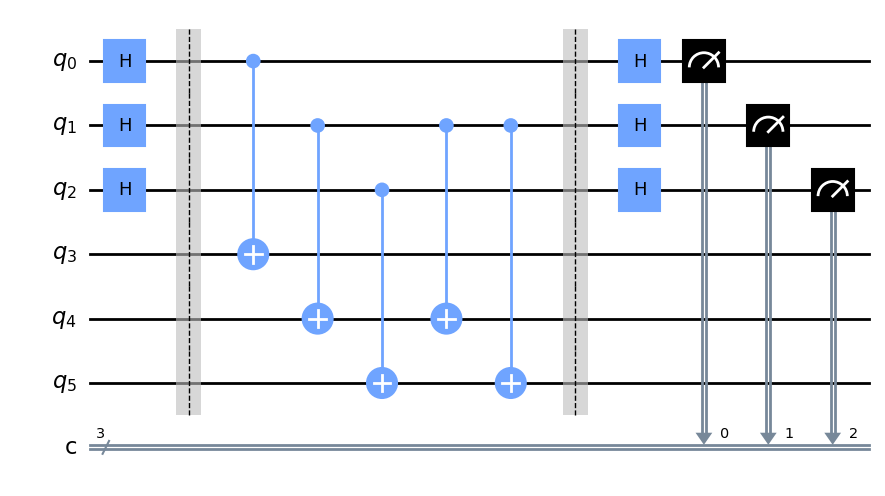

In [12]:
b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

simon_circuit.h(range(n))    
    
simon_circuit.barrier()

simon_circuit+=simon_oracle(b)

simon_circuit.barrier()

simon_circuit.h(range(n))

simon_circuit.measure(range(n), range(n))
simon_circuit.draw(output='mpl')

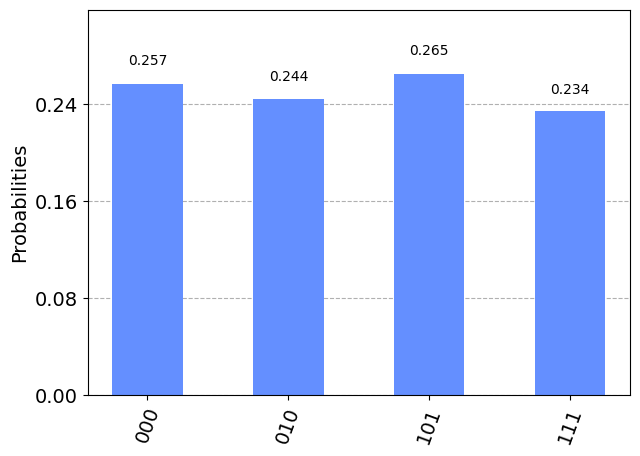

In [8]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(simon_circuit, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

011


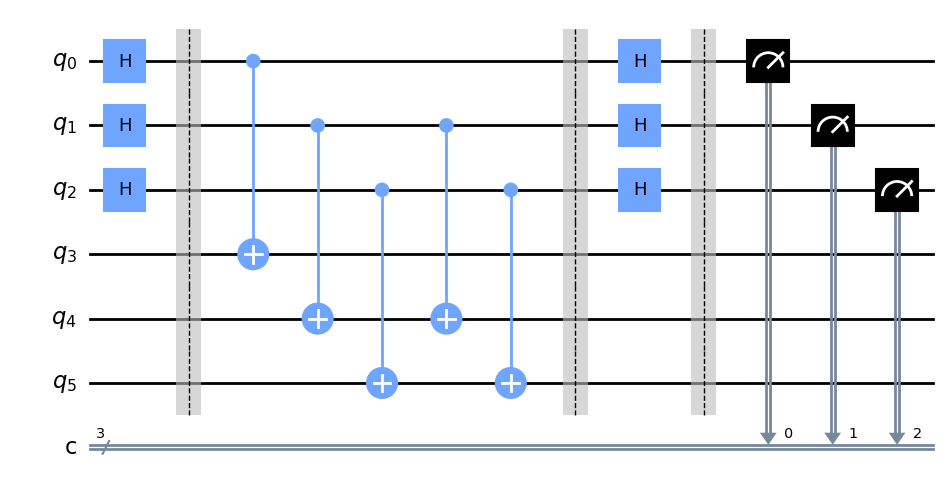

In [16]:
b='110'

b=b[::-1]

print(b)

n=len(b)

qc=QuantumCircuit(2*n,n)

qc.h(range(n))    
    
qc.barrier()

for i in range(n):
    qc.cx(i,n+i)
    
for i in range(n):
    if b[i]=='1':
        qc.cx(i,n+i)

qc.barrier()

qc.h(range(n))    
    
qc.barrier()

qc.measure(range(n), range(n))

qc.draw(output='mpl')

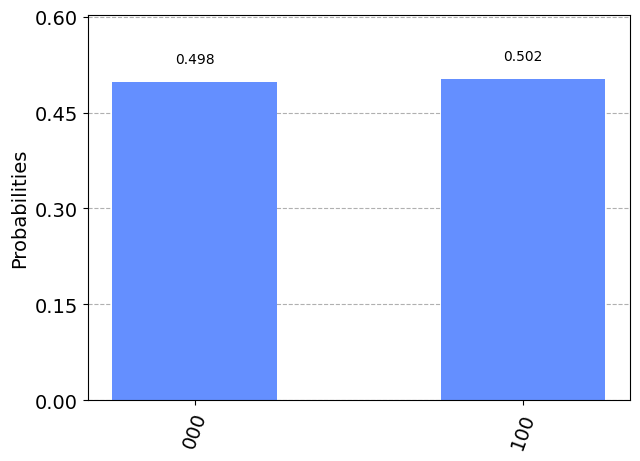

In [5]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(qc, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)